# General Tips
## Using virtual environments
**Step 1:** CD to desired directory and Create a Virtual Environment `python3 -m venv myenv`. (Run `py -3.13 -m venv myenv` for a specific version of python)

Check your python installed versions with `py -0` on Windows (`python3 --version` on Linux)

**Step 2:** Activate the Environment `source myenv/bin/activate` (on Linux) and `myenv\Scripts\activate` (on Windows).

**Step 3:** Install Any Needed Packages. e.g: `pip install requests pandas`. Or better to use `requirements.txt` file (`pip install -r requirements.txt`)

**Step 4:** List All Installed Packages using `pip list`

## Connecting the Jupyter Notebook to the vistual env
1. Make sure that myenv is activate (`myenv\Scripts\activate`)
2. Run this inside the virtual environment: `pip install ipykernel`
3. Still inside the environment: `python -m ipykernel install --user --name=myenv --display-name "Whatever Python Kernel Name"`
   
   --name=myenv: internal identifier for the kernel
   
   --display-name: name that shows up in VS Code kernel picker
4. Open VS Code and select the kernel

   At the top-right, click "Select Kernel".
   Look for “Whatever Python Kernel Name” — pick that.
5. If you don’t see it right away, try: Reloading VS Code, Or running Reload Window from Command Palette (Ctrl+Shift+P)

## Useful Commands
1. Use `py -0` to check which python installation we have on Windows

In [1]:
# Step 1: Load and Preview FinanceBench Data

from datasets import load_dataset
import pandas as pd

# Load the FinanceBench dataset (train split)
ds = load_dataset("PatronusAI/financebench", split="train")

# Display the number of records
print(f"Number of records: {len(ds)}")

# Convert first 3 records to a DataFrame for easy preview
df_preview = pd.DataFrame(ds[:3])
pd.set_option('display.max_colwidth', 300)
display(df_preview.T)  # Transposed for easier reading

# Optionally: check the structure of the 'evidence' field in the first record
print("Sample 'evidence' field:")
print(ds[0]['evidence'])

/Users/mehrdad/projects/finance-rag/finance-rag/labs/financebench_bm_llm_generation/venv_fb_bm_llm_g/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
/Users/mehrdad/projects/finance-rag/finance-rag/labs/financebench_bm_llm_generation/venv_fb_bm_llm_g/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Number of records: 150


,0,1,2
financebench_id,financebench_id_03029,financebench_id_04672,financebench_id_00499
company,3M,3M,3M
doc_name,3M_2018_10K,3M_2018_10K,3M_2022_10K
question_type,metrics-generated,metrics-generated,domain-relevant
question_reasoning,Information extraction,Information extraction,Logical reasoning (based on numerical reasoning)
domain_question_num,None,None,dg06
question,What is the FY2018 capital expenditure amount (in USD millions) for 3M? Give a response to the question by relying on the details shown in the cash flow statement.,Assume that you are a public equities analyst. Answer the following question by primarily using information that is shown in the balance sheet: what is the year end FY2018 net PPNE for 3M? Answer in USD billions.,Is 3M a capital-intensive business based on FY2022 data?
answer,$1577.00,$8.70,"No, the company is managing its CAPEX and Fixed Assets pretty efficiently, which is evident from below key metrics:\nCAPEX/Revenue Ratio: 5.1%\nFixed assets/Total Assets: 20%\nReturn on Assets= 12.4%"
justification,"The metric capital expenditures was directly extracted from the company 10K. The line item name, as seen in the 10K, was: Purchases of property, plant and equipment (PP&E).","The metric ppne, net was directly extracted from the company 10K. The line item name, as seen in the 10K, was: Property, plant and equipment â net.",CAPEX/Revenue\nFixed Assets/Total Assets\nROA=Net Income/Total Assets
dataset_subset_label,OPEN_SOURCE,OPEN_SOURCE,OPEN_SOURCE


Sample 'evidence' field:
[{'evidence_text': 'Table of Contents \n3M Company and Subsidiaries\nConsolidated Statement of Cash Flow s\nYears ended December 31\n \n(Millions)\n \n2018\n \n2017\n \n2016\n \nCash Flows from Operating Activities\n \n \n \n \n \n \n \nNet income including noncontrolling interest\n \n$\n5,363 \n$\n4,869 \n$\n5,058 \nAdjustments to reconcile net income including noncontrolling interest to net cash\nprovided by operating activities\n \n \n \n \n \n \n \nDepreciation and amortization\n \n \n1,488 \n \n1,544 \n \n1,474 \nCompany pension and postretirement contributions\n \n \n(370) \n \n(967) \n \n(383) \nCompany pension and postretirement expense\n \n \n410 \n \n334 \n \n250 \nStock-based compensation expense\n \n \n302 \n \n324 \n \n298 \nGain on sale of businesses\n \n \n(545) \n \n(586) \n \n(111) \nDeferred income taxes\n \n \n(57) \n \n107 \n \n 7 \nChanges in assets and liabilities\n \n \n \n \n \n \n \nAccounts receivable\n \n \n(305) \n \n(245) \n \n(313)

In [2]:
# Step 2: Normalize FinanceBench Data (using all evidence texts)

import pandas as pd

def extract_evidence_text(evidence_list):
    """Concatenate all evidence_text fields from the evidence list."""
    if evidence_list and isinstance(evidence_list, list):
        if len(evidence_list) > 1:
            print(f"containing {len(evidence_list)} evidence items")
        texts = [e.get("evidence_text", "") for e in evidence_list if "evidence_text" in e]
        return "\n\n".join(texts)
    return ""

# Build a normalized DataFrame
data = []
for record in ds:
    data.append({
        "financebench_id": record.get("financebench_id"),
        "company": record.get("company"),
        "doc_name": record.get("doc_name"),
        "question": record.get("question"),
        "answer": record.get("answer"),
        "evidence_text": extract_evidence_text(record.get("evidence", []))
    })

df = pd.DataFrame(data)

# Show a preview
print("Preview of normalized data:")
display(df.head(3).T)

containing 3 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 3 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 3 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 3 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
containing 2 evidence items
Preview of normalize

,0,1,2
financebench_id,financebench_id_03029,financebench_id_04672,financebench_id_00499
company,3M,3M,3M
doc_name,3M_2018_10K,3M_2018_10K,3M_2022_10K
question,What is the FY2018 capital expenditure amount (in USD millions) for 3M? Give a response to the question by relying on the details shown in the cash flow statement.,Assume that you are a public equities analyst. Answer the following question by primarily using information that is shown in the balance sheet: what is the year end FY2018 net PPNE for 3M? Answer in USD billions.,Is 3M a capital-intensive business based on FY2022 data?
answer,$1577.00,$8.70,"No, the company is managing its CAPEX and Fixed Assets pretty efficiently, which is evident from below key metrics:\nCAPEX/Revenue Ratio: 5.1%\nFixed assets/Total Assets: 20%\nReturn on Assets= 12.4%"
evidence_text,"Table of Contents \n3M Company and Subsidiaries\nConsolidated Statement of Cash Flow s\nYears ended December 31\n \n(Millions)\n \n2018\n \n2017\n \n2016\n \nCash Flows from Operating Activities\n \n \n \n \n \n \n \nNet income including noncontrolling interest\n \n$\n5,363 \n$\n4,869 \n$\n5,058...","Table of Contents \n3M Company and Subsidiaries\nConsolidated Balance Shee t\nAt December 31\n \n \n \nDecember 31,\n \nDecember 31,\n \n(Dollars in millions, except per share amount)\n \n2018\n \n2017\n \nAssets\n \n \n \n \n \nCurrent assets\n \n \n \n \n \nCash and cash equivalents\n \n$\n2,8...","3M Company and Subsidiaries\nConsolidated Statement of Income\nYears ended December 31\n(Millions, except per share amounts)\n2022\n2021\n2020\nNet sales\n$\n34,229 $\n35,355 $\n32,184\n\n3M Company and Subsidiaries\nConsolidated Balance Sheet\nAt December 31\n(Dollars in millions, except per sh..."


In [125]:
# Step 3A: Configure the list of LLM models for Ollama (via LangChain)

LLM_MODELS = [
    "phi3:3.8b",
    "phi4-mini:3.8b",
    "phi3:14b",
    "phi4:14b",
    "mistral:7b",
    "llama2:7b",
    "llama3:8b",
    "llama3.1:8b",
    "gemma:7b",
    "gemma2:9b",
    "gemma3:12b",
    "gemma3n:e4b",
    "gpt-4o-mini",
    "gpt-4o",
]

In [101]:
from langchain.prompts import PromptTemplate

prompt_template = PromptTemplate(
    input_variables=["context", "question"],
    template=(
        "You are a financial assistant. Using only the information provided in the context below, "
        "answer the question as concisely and factually as possible. "
        "Do not provide explanations, reasoning, or analysis—only provide the answer itself.\n\n"
        "Context:\n{context}\n\n"
        "Question:\n{question}\n\n"
        "Answer:"
    )
)

# Example: formatting a prompt for the first row
test_prompt = prompt_template.format(
    context=df.iloc[0]["evidence_text"],
    question=df.iloc[0]["question"]
)
print(test_prompt)

You are a financial assistant. Using only the information provided in the context below, answer the question as concisely and factually as possible. Do not provide explanations, reasoning, or analysis—only provide the answer itself.

Context:
Table of Contents 
3M Company and Subsidiaries
Consolidated Statement of Cash Flow s
Years ended December 31
 
(Millions)
 
2018
 
2017
 
2016
 
Cash Flows from Operating Activities
 
 
 
 
 
 
 
Net income including noncontrolling interest
 
$
5,363 
$
4,869 
$
5,058 
Adjustments to reconcile net income including noncontrolling interest to net cash
provided by operating activities
 
 
 
 
 
 
 
Depreciation and amortization
 
 
1,488 
 
1,544 
 
1,474 
Company pension and postretirement contributions
 
 
(370) 
 
(967) 
 
(383) 
Company pension and postretirement expense
 
 
410 
 
334 
 
250 
Stock-based compensation expense
 
 
302 
 
324 
 
298 
Gain on sale of businesses
 
 
(545) 
 
(586) 
 
(111) 
Deferred income taxes
 
 
(57) 
 
107 
 
 7

In [103]:
# Choose the model you want to run
CURRENT_MODEL_NAME = "phi3:14b"

# Step 3B: LangChain Ollama LLM Setup for one selected model
from langchain_community.llms import Ollama

# Instantiate the selected model
llm = Ollama(model=CURRENT_MODEL_NAME)
print(f"LLM configured: {CURRENT_MODEL_NAME}")

LLM configured: phi3:14b


In [ ]:
# Step 4: Run inference for CURRENT_MODEL_NAME and save results
from tqdm.auto import tqdm

num_samples = 150  # Adjust as needed

def extract_final_answer(llm_output):
    marker = "Answer:"
    if marker in llm_output:
        return llm_output.split(marker, 1)[1].strip()
    return llm_output.strip()

df_subset = df.head(num_samples)

results = []

print(f"Running inference with model: {CURRENT_MODEL_NAME}")
for idx, row in tqdm(df_subset.iterrows(), total=len(df_subset), desc=CURRENT_MODEL_NAME):
    prompt = prompt_template.format(
        context=row["evidence_text"],
        question=row["question"]
    )
    try:
        generated_answer = llm(prompt)
        postprocessed_answer = extract_final_answer(generated_answer)
    except Exception as e:
        print(f"Error on row {idx}: {e}")
        postprocessed_answer = "ERROR: " + str(e)

    results.append({
        "financebench_id": row["financebench_id"],
        "company": row["company"],
        "doc_name": row["doc_name"],
        "question": row["question"],
        "evidence_text": row["evidence_text"],
        "reference_answer": row["answer"],
        "model": CURRENT_MODEL_NAME,
        "generated_answer": postprocessed_answer
    })

results_df = pd.DataFrame(results)

# Sanitize model name for filenames
model_filename = CURRENT_MODEL_NAME.replace(":", "_").replace("/", "_")

# Save to files
results_df.to_csv(f"financebench_llm_results__{model_filename}.csv", index=False)
results_df.to_json(f"financebench_llm_results__{model_filename}.json", orient="records", lines=True)

print("Preview of results:")
display(results_df.head(3).T)


Running inference with model: phi3:14b


phi3:14b: 100%|██████████| 150/150 [1:16:44<00:00, 30.70s/it]

Preview of results:


,0,1,2
financebench_id,financebench_id_03029,financebench_id_04672,financebench_id_00499
company,3M,3M,3M
doc_name,3M_2018_10K,3M_2018_10K,3M_2022_10K
question,What is the FY2018 capital expenditure amount (in USD millions) for 3M? Give a response to the question by relying on the details shown in the cash flow statement.,Assume that you are a public equities analyst. Answer the following question by primarily using information that is shown in the balance sheet: what is the year end FY2018 net PPNE for 3M? Answer in USD billions.,Is 3M a capital-intensive business based on FY2022 data?
evidence_text,"Table of Contents \n3M Company and Subsidiaries\nConsolidated Statement of Cash Flow s\nYears ended December 31\n \n(Millions)\n \n2018\n \n2017\n \n2016\n \nCash Flows from Operating Activities\n \n \n \n \n \n \n \nNet income including noncontrolling interest\n \n$\n5,363 \n$\n4,869 \n$\n5,058...","Table of Contents \n3M Company and Subsidiaries\nConsolidated Balance Shee t\nAt December 31\n \n \n \nDecember 31,\n \nDecember 31,\n \n(Dollars in millions, except per share amount)\n \n2018\n \n2017\n \nAssets\n \n \n \n \n \nCurrent assets\n \n \n \n \n \nCash and cash equivalents\n \n$\n2,8...","3M Company and Subsidiaries\nConsolidated Statement of Income\nYears ended December 31\n(Millions, except per share amounts)\n2022\n2021\n2020\nNet sales\n$\n34,229 $\n35,355 $\n32,184\n\n3M Company and Subsidiaries\nConsolidated Balance Sheet\nAt December 31\n(Dollars in millions, except per sh..."
reference_answer,$1577.00,$8.70,"No, the company is managing its CAPEX and Fixed Assets pretty efficiently, which is evident from below key metrics:\nCAPEX/Revenue Ratio: 5.1%\nFixed assets/Total Assets: 20%\nReturn on Assets= 12.4%"
model,phi3:14b,phi3:14b,phi3:14b
generated_answer,"The FY2018 capital expenditure amount (purchases of property, plant and equipment - PP&E) for 3M is $1,577 million USD.","The year-end net PPNE (Post-Tax Net Earnings) for 3M Company for Fiscal Year 2018 is not explicitly provided in the balance sheet information given. The relevant details such as pretax earnings or tax rate are absent, thus a direct calculation cannot be made from this data alone.","No. The ratio of Property, Plant, and Equipment (PP&E) net to total assets for 3M in 2022 is approximately 19.7% ($9,178 million / $46,455 million), which suggests that the company may not be considered highly capital intensive based on this single year's data."


In [ ]:
# Just for OpenAI models
# Choose the model you want to run
CURRENT_MODEL_NAME = "gpt-4o"  # 'gpt-4o' is the new mini model, per OpenAI

# Step 3B: LangChain OpenAI LLM Setup for one selected model
from langchain_openai import ChatOpenAI

# Instantiate the selected model

llm = ChatOpenAI(model="gpt-4o-mini", 
                 api_key="")  # You can add openai_api_key=... if needed
print(f"LLM configured: {CURRENT_MODEL_NAME}")

# Step 4: Run inference for CURRENT_MODEL_NAME and save results
from tqdm.auto import tqdm

num_samples = 150  # Adjust as needed

def extract_final_answer(llm_output):
    marker = "Answer:"
    if marker in llm_output:
        return llm_output.split(marker, 1)[1].strip()
    return llm_output.strip()

df_subset = df.head(num_samples)

results = []

print(f"Running inference with model: {CURRENT_MODEL_NAME}")
for idx, row in tqdm(df_subset.iterrows(), total=len(df_subset), desc=CURRENT_MODEL_NAME):
    prompt = prompt_template.format(
        context=row["evidence_text"],
        question=row["question"]
    )
    try:
        # ChatOpenAI returns a message object, so get the content
        generated_answer = llm.invoke(prompt).content
        postprocessed_answer = extract_final_answer(generated_answer)
    except Exception as e:
        print(f"Error on row {idx}: {e}")
        postprocessed_answer = "ERROR: " + str(e)

    results.append({
        "financebench_id": row["financebench_id"],
        "company": row["company"],
        "doc_name": row["doc_name"],
        "question": row["question"],
        "evidence_text": row["evidence_text"],
        "reference_answer": row["answer"],
        "model": CURRENT_MODEL_NAME,
        "generated_answer": postprocessed_answer
    })

results_df = pd.DataFrame(results)

# Sanitize model name for filenames
model_filename = CURRENT_MODEL_NAME.replace(":", "_").replace("/", "_")

# Save to files
results_df.to_csv(f"financebench_llm_results__{model_filename}.csv", index=False)
results_df.to_json(f"financebench_llm_results__{model_filename}.json", orient="records", lines=True)

print("Preview of results:")
display(results_df.head(3).T)


LLM configured: gpt-4o
Running inference with model: gpt-4o


gpt-4o: 100%|██████████| 150/150 [02:14<00:00,  1.11it/s]

Preview of results:


,0,1,2
financebench_id,financebench_id_03029,financebench_id_04672,financebench_id_00499
company,3M,3M,3M
doc_name,3M_2018_10K,3M_2018_10K,3M_2022_10K
question,What is the FY2018 capital expenditure amount (in USD millions) for 3M? Give a response to the question by relying on the details shown in the cash flow statement.,Assume that you are a public equities analyst. Answer the following question by primarily using information that is shown in the balance sheet: what is the year end FY2018 net PPNE for 3M? Answer in USD billions.,Is 3M a capital-intensive business based on FY2022 data?
evidence_text,"Table of Contents \n3M Company and Subsidiaries\nConsolidated Statement of Cash Flow s\nYears ended December 31\n \n(Millions)\n \n2018\n \n2017\n \n2016\n \nCash Flows from Operating Activities\n \n \n \n \n \n \n \nNet income including noncontrolling interest\n \n$\n5,363 \n$\n4,869 \n$\n5,058...","Table of Contents \n3M Company and Subsidiaries\nConsolidated Balance Shee t\nAt December 31\n \n \n \nDecember 31,\n \nDecember 31,\n \n(Dollars in millions, except per share amount)\n \n2018\n \n2017\n \nAssets\n \n \n \n \n \nCurrent assets\n \n \n \n \n \nCash and cash equivalents\n \n$\n2,8...","3M Company and Subsidiaries\nConsolidated Statement of Income\nYears ended December 31\n(Millions, except per share amounts)\n2022\n2021\n2020\nNet sales\n$\n34,229 $\n35,355 $\n32,184\n\n3M Company and Subsidiaries\nConsolidated Balance Sheet\nAt December 31\n(Dollars in millions, except per sh..."
reference_answer,$1577.00,$8.70,"No, the company is managing its CAPEX and Fixed Assets pretty efficiently, which is evident from below key metrics:\nCAPEX/Revenue Ratio: 5.1%\nFixed assets/Total Assets: 20%\nReturn on Assets= 12.4%"
model,gpt-4o,gpt-4o,gpt-4o
generated_answer,"$1,577 million",$8.738 billion,Yes.


## Evaluation

In [127]:
# Step 5: Manual Inspection with Pandas (across multiple model results)

import os
import pandas as pd

all_results = []

for model_name in LLM_MODELS:
    model_filename = model_name.replace(":", "_").replace("/", "_")
    file_path = f"financebench_llm_results__{model_filename}.csv"
    
    if os.path.exists(file_path):
        df_model = pd.read_csv(file_path)
        all_results.append(df_model)
        print(f"Loaded results for model: {model_name}")
    else:
        print(f"⚠️ Warning: File not found for model '{model_name}' -> Skipping")

# Combine all loaded DataFrames
if not all_results:
    raise ValueError("No result files found. Please ensure at least one model has been run.")

results_df = pd.concat(all_results, ignore_index=True)

# Pivot: one row per question, columns per model
pivot_df = results_df.pivot_table(
    index=['financebench_id', 'question', 'reference_answer'],
    columns='model',
    values='generated_answer',
    aggfunc='first'
).reset_index()

# Clean column display
pivot_df.columns.name = None
pd.set_option('display.max_colwidth', 300)

#display(pivot_df)


Loaded results for model: phi3:3.8b
Loaded results for model: phi4-mini:3.8b
Loaded results for model: phi3:14b
Loaded results for model: phi4:14b
Loaded results for model: mistral:7b
Loaded results for model: llama2:7b
Loaded results for model: llama3:8b
Loaded results for model: llama3.1:8b
Loaded results for model: gemma:7b
Loaded results for model: gemma2:9b
Loaded results for model: gemma3:12b
Loaded results for model: gemma3n:e4b
Loaded results for model: gpt-4o-mini
Loaded results for model: gpt-4o


In [128]:
import pandas as pd
import re

def clean_text(text):
    """Lowercase, remove punctuation, and strip leading/trailing spaces."""
    if pd.isnull(text):
        return ""
    # Lowercase
    text = text.lower()
    # Remove punctuation
    #text = re.sub(r'[^\w\s]', '', text)
    # Strip
    return text.strip()

# Assume `pivot_df` is your DataFrame (with columns: 'reference_answer', model1, model2, ...)
pivot_df['reference_answer_clean'] = pivot_df['reference_answer'].apply(clean_text)

# Clean all model answer columns (assuming first 3 columns are IDs and 'reference_answer')
model_cols = [col for col in pivot_df.columns if col not in ['financebench_id', 'question', 'reference_answer', 'reference_answer_clean']]
for model in model_cols:
    pivot_df[model + '_clean'] = pivot_df[model].apply(clean_text)

# Preview
pivot_df[[ 'question', 'reference_answer_clean'] + [col+'_clean' for col in model_cols]].head()

,question,reference_answer_clean,gemma2:9b_clean,gemma3:12b_clean,gemma3n:e4b_clean,gemma:7b_clean,gpt-4o_clean,gpt-4o-mini_clean,llama2:7b_clean,llama3.1:8b_clean,llama3:8b_clean,mistral:7b_clean,phi3:14b_clean,phi3:3.8b_clean,phi4-mini:3.8b_clean,phi4:14b_clean
0,"Does Corning have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.",yes. corning had a positive working capital amount of $831 million by fy 2022 close. this answer considers only operating current assets and current liabilities that were clearly shown in the balance sheet.,yes.,"yes, $7,453","yes, corning has positive working capital based on fy2022 data.\n\nworking capital may not be a useful or relevant metric for corning because its business involves significant investments in property, plant, and equipment and inventories. these investments can lead to large amounts of current as...","based on the fy2022 data, corning has positive working capital, with total current assets of $7,453 million and total current liabilities of $5,175 million.","yes, corning has positive working capital based on fy2022 data.","yes, corning has positive working capital based on fy2022 data.","yes, corning has positive working capital based on fy2022 data. the company's current assets of $7,453 million exceed its current liabilities of $5,175 million, resulting in a positive working capital of $2,278 million.","yes. total current assets ($7,453) exceed total current liabilities ($5,175).","yes, corning has positive working capital based on fy2022 data.","yes, corning has positive working capital based on fy2022 data. total current assets ($7,453) are greater than the total current liabilities ($5,175).","yes, corning has positive working capital in fy2022. working capital = total current assets - total current liabilities = $7,453 million - $5,175 million = $2,278 million. this is a positive value indicating that the company has more short-term assets than liabilities and can meet its short-term...","yes, the working capital calculation for december 31, 2022 would be current assets minus total liabilities, resulting in $7,453 million - $17,224 million = -$9,771 million (negative working capital). however, if working capital is not a useful metric, it could be due to the company's business mo...","yes; however, it's not a comprehensive indicator of financial health because it does not account for the nature of corning's business involving long-cycle investments and acquisitions that can significantly affect working capital metrics independently from operating performance or profitability....","yes, corning has positive working capital in fy 2022. working capital is calculated as total current assets minus total current liabilities. for fy 2022, the calculation is:\n\ntotal current assets = $7,453 million \ntotal current liabilities = $5,175 million \n\nworking capital = $7,453 milli..."
1,"Does American Water Works have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.","no, american water works had negative working capital of -$1561m in fy 2022.",yes.,yes.,"yes.\n\nworking capital is not a useful or relevant metric for this company because its primary business is utility services, which typically have stable and predictable cash flows. therefore, short-term debt and other current liabilities are manageable, and a high working capital figure may not...","based on the fy2022 data provided, american water works has positive working capital (1,250 - 2,811 = 439).","yes, american water works has positive working capital based on fy2022 data.","no, american water works does not have positive working capital based on fy2022 data.","based on the provided financial statements for american water works company, inc. and its subsidiary companies as of december 31, 2022, the compan

## LLM-Based Evaluation

In [129]:
from langchain.prompts import PromptTemplate

eval_prompt_template = PromptTemplate(
    input_variables=["question", "ground_truth_answer", "generated_answer"],
    template=(
        "Are the two following answers (Answer 1 and Answer 2) the same with respect to the question between single quotes '{question}'?\n\n"
        "Answer 1: '{ground_truth_answer}'\n"
        "Answer 2: '{generated_answer}'\n"
        "Please just give one of the answers: 'true' or 'false'. Do not include any explanation.\n\n"

        "Example:\n"
        "Question: 'What is the capital of France?'\n"
        "Answer 1: 'Paris is the capital of France.'\n"
        "Answer 2: 'The capital of France is Paris.'\n"
        "Answer: true\n"
    )
)


In [130]:
from langchain_community.llms import Ollama
import pandas as pd

# Set the model to evaluate and the evaluator LLM
EVALUATOR_MODEL_NAME = "gemma3:12b"

evaluator_llm = Ollama(model=EVALUATOR_MODEL_NAME)

eval_llm_records = []

# Sanitize name to match pivot_df column
if CURRENT_MODEL_NAME not in pivot_df.columns:
    raise ValueError(f"Model '{CURRENT_MODEL_NAME}' not found in pivot_df columns.")

print(f"Evaluating model: {CURRENT_MODEL_NAME} with judge: {EVALUATOR_MODEL_NAME}")
for idx, row in pivot_df.iterrows():
    prompt = eval_prompt_template.format(
        question=row['question'],
        ground_truth_answer=row['reference_answer'],
        generated_answer=row[CURRENT_MODEL_NAME]
    )
    eval_output = evaluator_llm(prompt).strip().lower()
    
    if "true" in eval_output and "false" in eval_output:
        raise ValueError(f"Ambiguous output at row {idx}: {eval_output}")
    elif "true" in eval_output:
        eval_bool = "True"
    elif "false" in eval_output:
        eval_bool = "False"
    else:
        raise ValueError(f"Unrecognized output at row {idx}: {eval_output}")
    
    eval_llm_records.append({
        'financebench_id': row['financebench_id'],
        'question': row['question'],
        'reference_answer': row['reference_answer'],
        'generated_answer': row[CURRENT_MODEL_NAME],
        'model': CURRENT_MODEL_NAME,
        'evaluator_model': EVALUATOR_MODEL_NAME,
        'llm_eval': eval_bool
    })

# Save to CSV
eval_df = pd.DataFrame(eval_llm_records)

# Define the desired output directory
EVAL_DIR = "evaluation"  # Change this to your desired folder
# Create the folder if it doesn't exist
os.makedirs(EVAL_DIR, exist_ok=True)

out_filename = f"financebench_llm_eval__{CURRENT_MODEL_NAME.replace(':','_')}__judge_{EVALUATOR_MODEL_NAME.replace(':','_')}.csv"
out_path = os.path.join(EVAL_DIR, out_filename)
eval_df.to_csv(out_path, index=False)
print(f"Saved evaluation to: {out_path}")
display(eval_df.head())


Evaluating model: gpt-4o with judge: gemma3:12b
Saved evaluation to: evaluation/financebench_llm_eval__gpt-4o__judge_gemma3_12b.csv


,financebench_id,question,reference_answer,generated_answer,model,evaluator_model,llm_eval
0,financebench_id_00005,"Does Corning have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.",Yes. Corning had a positive working capital amount of $831 million by FY 2022 close. This answer considers only operating current assets and current liabilities that were clearly shown in the balance sheet.,"Yes, Corning has positive working capital based on FY2022 data.",gpt-4o,gemma3:12b,False
1,financebench_id_00070,"Does American Water Works have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.","No, American Water Works had negative working capital of -$1561M in FY 2022.","Yes, American Water Works has positive working capital based on FY2022 data.",gpt-4o,gemma3:12b,False
2,financebench_id_00080,"Does Paypal have positive working capital based on FY2022 data? If working capital is not a useful or relevant metric for this company, then please state that and explain why.",Yes. Paypal has a positive working capital of $ 1.6Bn as of FY2022 end.,"Yes, PayPal has positive working capital based on FY2022 data.",gpt-4o,gemma3:12b,True
3,financebench_id_00206,"Are JPM's gross margins historically consistent (not fluctuating more than roughly 2% each year)? If gross margins are not a relevant metric for a company like this, then please state that and explain why.","Since JPM is a financial institution, gross margin is not a relevant metric.","Gross margins are not a relevant metric for a company like JPMorgan Chase, as it primarily operates in financial services rather than manufacturing or product sales, where gross margins are typically analyzed.",gpt-4o,gemma3:12b,True
4,financebench_id_00215,Is Verizon a capital intensive business based on FY 2022 data?,"Yes. Verizon's capital intensity ratio was approximately 2.774729. This means that it took approximately $2.77 of assets to generate $1 of revenue and thus, Verizon can be considered capital intensive.",Yes.,gpt-4o,gemma3:12b,False


LLM-based answer agreement per model:


llm_eval,False,True,True %
model,,,
gemma2:9b,89,61,40.666667
gemma3:12b,94,56,37.333333
gemma3n:e4b,100,50,33.333333
gemma:7b,101,49,32.666667
gpt-4o,62,88,58.666667
gpt-4o-mini,63,87,58.000000
llama2:7b,106,44,29.333333
llama3.1:8b,86,64,42.666667
llama3:8b,83,67,44.666667


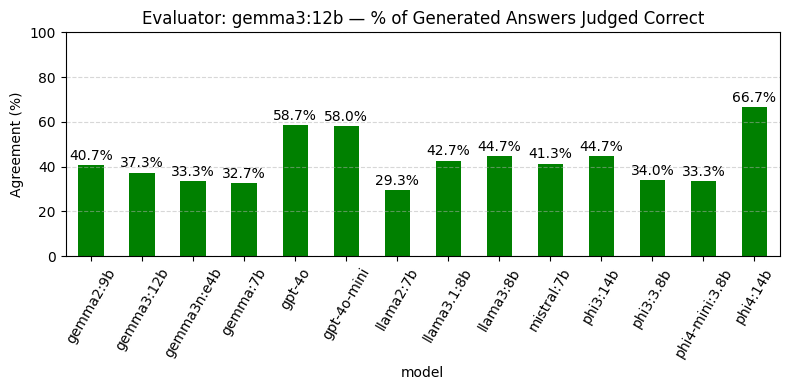

In [131]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Set evaluator model name (same as used in Block 9)
EVALUATOR_MODEL_NAME = "gemma3:12b"

# Sanitize for filenames
evaluator_tag = EVALUATOR_MODEL_NAME.replace(':', '_')

# Load all evaluation CSVs matching the evaluator
eval_files = glob.glob(os.path.join(EVAL_DIR, f"financebench_llm_eval__*__judge_{evaluator_tag}.csv"))

if not eval_files:
    raise FileNotFoundError(f"No evaluation files found for evaluator '{EVALUATOR_MODEL_NAME}'.")

# Load and combine all evaluation records
eval_dfs = [pd.read_csv(f) for f in eval_files]
all_eval_df = pd.concat(eval_dfs, ignore_index=True)

# Normalize values
all_eval_df['llm_eval'] = all_eval_df['llm_eval'].astype(str).str.strip().str.capitalize()

# Save full combined evaluation
out_path = os.path.join(EVAL_DIR, f"financebench_llm_eval_all_records__judge_{evaluator_tag}.csv")
all_eval_df.to_csv(out_path, index=False)

# Group and aggregate
agg_llm_df = all_eval_df.groupby('model')['llm_eval'].value_counts().unstack(fill_value=0)

# Ensure both 'True' and 'False' columns exist
for col in ['True', 'False']:
    if col not in agg_llm_df.columns:
        agg_llm_df[col] = 0

# Compute percentage
agg_llm_df['True %'] = (agg_llm_df['True'] / (agg_llm_df['True'] + agg_llm_df['False'])) * 100
agg_llm_df['True %'] = agg_llm_df['True %'].fillna(0)

# Save aggregated summary
out_path = os.path.join(EVAL_DIR, f"financebench_llm_eval_aggregated__judge_{evaluator_tag}.csv")
agg_llm_df.to_csv(out_path)

# Show result
print("LLM-based answer agreement per model:")
display(agg_llm_df)

# Plot
if not agg_llm_df['True %'].isnull().all():
    ax = agg_llm_df['True %'].plot(kind='bar', color='green', figsize=(8, 4))
    plt.ylabel('Agreement (%)')
    plt.title(f"Evaluator: {EVALUATOR_MODEL_NAME} — % of Generated Answers Judged Correct")
    plt.ylim(0, 100)
    plt.xticks(rotation=60)
    plt.grid(axis='y', linestyle='--', alpha=0.5)

    # Add labels on bars
    for i, val in enumerate(agg_llm_df['True %']):
        plt.text(i, val + 1, f"{val:.1f}%", ha='center', va='bottom')

    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No valid 'True %' data to plot.")
